# Tiền xử lý dữ liệu

## Mục tiêu:
- Đọc dữ liệu World Bank đã tổng hợp (2000–2024)
- Khám phá, làm sạch, và chuẩn hóa dữ liệu
- Chia dữ liệu thành train/test để phục vụ các mô hình Machine Learning

Nguồn dữ liệu: `data/worldbank_2000_2024.csv`


## Bước 1 - Đọc dữ liệu

Import các thư viện cần thiết

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

Đọc dữ liệu từ file CSV và loại bỏ các bản ghi trùng lặp để đảm bảo chất lượng dữ liệu.


In [2]:
# Đọc dữ liệu
df = pd.read_csv("../data/worldbank_2000_2024.csv")
print("=== Dữ liệu gốc (5 dòng đầu) ===")
df.head()  

=== Dữ liệu gốc (5 dòng đầu) ===


,Country Name,Country Code,Year,"Population, total",Poverty headcount ratio at $3.00 a day (2021 PPP) (% of population),Population growth (annual %),"Life expectancy at birth, total (years)",GDP per capita (current US$),GDP growth (annual %),People using safely managed sanitation services (% of population),Access to electricity (% of population),People using at least basic drinking water services (% of population),Carbon dioxide (CO2) emissions excluding LULUCF per capita (t CO2e/capita),Population living in slums (% of urban population),"Labor force participation rate, total (% of total population ages 15+) (modeled ILO estimate)"
0,Aruba,ABW,2000,90588.0,NaN,1.030817,72.939,20681.023027,7.622921,NaN,91.7,94.488806,2.965073,0.0,NaN
1,Aruba,ABW,2001,91439.0,NaN,0.935033,73.044,20740.132583,4.182002,NaN,100.0,94.770491,2.969193,NaN,NaN
2,Aruba,ABW,2002,92074.0,NaN,0.692052,73.135,21307.248251,-0.944953,NaN,100.0,95.052176,3.221322,0.0,NaN
3,Aruba,ABW,2003,93128.0,NaN,1.138229,73.236,21949.485996,1.110505,NaN,100.0,95.333861,3.671291,NaN,NaN
4,Aruba,ABW,2004,95138.0,NaN,2.135358,73.223,23700.631990,7.293728,NaN,100.0,95.615545,3.667304,0.0,NaN


## Bước 2 - Tổng quan dữ liệu

Phân tích cấu trúc dữ liệu, kiểu dữ liệu và ý nghĩa của từng thuộc tính. Rút ngắn tên các cột để dễ dàng trong việc phân tích và trực quan hóa.


In [4]:
# Rút ngắn tên các cột để dễ phân tích
df.columns = [
    'country_name', 'country_code', 'year', 'population', 'poverty_ratio',
    'pop_growth', 'life_expectancy', 'gdp_per_capita', 'gdp_growth',
    'sanitation', 'electricity', 'water_access', 'co2_emissions',
    'slum_population', 'labor_force'
]

print("THÔNG TIN TỔNG QUAN VỀ DỮ LIỆU:")
print(f"Kích thước dữ liệu: {df.shape}")
print(f"Số quốc gia: {df['country_name'].nunique()}")
print(f"Khoảng thời gian: {df['year'].min()}-{df['year'].max()}")

print("\nÝ NGHĨA CÁC THUỘC TÍNH:")
print("1. country_name: Tên quốc gia")
print("2. country_code: Mã quốc gia")
print("3. year: Năm")
print("4. population: Tổng dân số")
print("5. poverty_ratio: Tỷ lệ nghèo (% dân số)")
print("6. pop_growth: Tăng trưởng dân số hàng năm (%)")
print("7. life_expectancy: Tuổi thọ trung bình (năm) - TARGET")
print("8. gdp_per_capita: GDP bình quân đầu người (USD)")
print("9. gdp_growth: Tăng trưởng GDP hàng năm (%)")
print("10. sanitation: Tỷ lệ sử dụng dịch vụ vệ sinh an toàn (%)")
print("11. electricity: Tỷ lệ tiếp cận điện (%)")
print("12. water_access: Tỷ lệ sử dụng nước uống cơ bản (%)")
print("13. co2_emissions: Lượng khí thải CO2 bình quân đầu người (tấn)")
print("14. slum_population: Tỷ lệ dân số sống trong khu ổ chuột (%)")
print("15. labor_force: Tỷ lệ tham gia lực lượng lao động (%)")

THÔNG TIN TỔNG QUAN VỀ DỮ LIỆU:
Kích thước dữ liệu: (5425, 15)
Số quốc gia: 217
Khoảng thời gian: 2000-2024

Ý NGHĨA CÁC THUỘC TÍNH:
1. country_name: Tên quốc gia
2. country_code: Mã quốc gia
3. year: Năm
4. population: Tổng dân số
5. poverty_ratio: Tỷ lệ nghèo (% dân số)
6. pop_growth: Tăng trưởng dân số hàng năm (%)
7. life_expectancy: Tuổi thọ trung bình (năm) - TARGET
8. gdp_per_capita: GDP bình quân đầu người (USD)
9. gdp_growth: Tăng trưởng GDP hàng năm (%)
10. sanitation: Tỷ lệ sử dụng dịch vụ vệ sinh an toàn (%)
11. electricity: Tỷ lệ tiếp cận điện (%)
12. water_access: Tỷ lệ sử dụng nước uống cơ bản (%)
13. co2_emissions: Lượng khí thải CO2 bình quân đầu người (tấn)
14. slum_population: Tỷ lệ dân số sống trong khu ổ chuột (%)
15. labor_force: Tỷ lệ tham gia lực lượng lao động (%)


In [5]:
print("\nTHÔNG TIN DỮ LIỆU:")
df.info()


THÔNG TIN DỮ LIỆU:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5425 entries, 0 to 5424
Data columns (total 15 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   country_name     5425 non-null   object 
 1   country_code     5425 non-null   object 
 2   year             5425 non-null   int64  
 3   population       5425 non-null   float64
 4   poverty_ratio    1834 non-null   float64
 5   pop_growth       5424 non-null   float64
 6   life_expectancy  5208 non-null   float64
 7   gdp_per_capita   5213 non-null   float64
 8   gdp_growth       5141 non-null   float64
 9   sanitation       3117 non-null   float64
 10  electricity      5135 non-null   float64
 11  water_access     4777 non-null   float64
 12  co2_emissions    4872 non-null   float64
 13  slum_population  2015 non-null   float64
 14  labor_force      4666 non-null   float64
dtypes: float64(12), int64(1), object(2)
memory usage: 635.9+ KB


## Bước 3 - Xử lý giá trị thiếu và giá trị trùng lặp
### Mục tiêu:
- Loại bỏ các giá trị trùng lặp
- Phân tích giá trị thiếu của từng biến
- Loại bỏ các dòng thiếu `life_expectancy` (biến mục tiêu)
- Loại bỏ các cột có tỷ lệ thiếu quá cao
- Chia dữ liệu train/validation/test **trước** khi điền thiếu và chuẩn hóa


### 3.1. Loại bỏ các hàng trùng lặp


In [6]:
print("Kích thước dữ liệu ban đầu:", df.shape)
rows_before = df.shape[0]
# Loại bỏ các hàng trùng lặp
df = df.drop_duplicates()
rows_after = df.shape[0]
removed = rows_before - rows_after

print("Kích thước sau khi loại bỏ trùng lặp:", df.shape)
print(f"Đã loại bỏ {removed} dòng trùng lặp.")

Kích thước dữ liệu ban đầu: (5425, 15)
Kích thước sau khi loại bỏ trùng lặp: (5425, 15)
Đã loại bỏ 0 dòng trùng lặp.


### 3.2. Loại bỏ các dòng thiếu `life_expectancy` (biến mục tiêu)
Các dòng thiếu biến mục tiêu sẽ không thể dùng để huấn luyện/đánh giá mô hình nên cần loại bỏ.


In [7]:
rows_before = df.shape[0]
# Lo?i b? c?c d?ng thi?u life_expectancy
df = df.dropna(subset=["life_expectancy"])
rows_after = df.shape[0]

print(f"?? lo?i b? {rows_before - rows_after} d?ng thi?u life_expectancy.")


?? lo?i b? 217 d?ng thi?u life_expectancy.


In [8]:
print(df.shape)

(5208, 15)


### 3.3. Phân tích giá trị thiếu
- Tính tỷ lệ thiếu của từng cột để nhận diện biến rủi ro.
- Ghi chú rõ biến nào không được dùng làm predictor (ví dụ target `life_expectancy`).


In [9]:
# Tính tỷ lệ thiếu (%)
missing_percent = (df.isnull().sum() / len(df)) * 100
missing_percent = missing_percent.sort_values(ascending=False)

# Chỉ hiển thị các giá trị lớn hơn 0
missing_df = pd.DataFrame({
    'Column': missing_percent[missing_percent > 0].index,
    'Missing (%)': missing_percent[missing_percent > 0].values
})

print("PHÂN TÍCH GIÁ TRỊ THIẾU:")
print(missing_df.to_string(index=False))

# Loại bỏ các cột có tỷ lệ thiếu quá cao (> 60%) để giảm rủi ro sai lệch do dự đoán
HIGH_MISSING_COLS = ["poverty_ratio", "slum_population"]
df = df.drop(columns=HIGH_MISSING_COLS)
print(f"\nLoại bỏ các cột thiếu >60%: {HIGH_MISSING_COLS}")

# Cập nhật numeric_cols SAU khi loại bỏ các cột HIGH_MISSING_COLS
numeric_cols = df.select_dtypes(include=[np.number]).columns


PHÂN TÍCH GIÁ TRỊ THIẾU:
         Column  Missing (%)
  poverty_ratio    65.034562
slum_population    61.309524
     sanitation    40.149770
    labor_force    13.901690
   water_access     8.275730
  co2_emissions     6.451613
     gdp_growth     4.819508
 gdp_per_capita     3.417819
    electricity     1.401690
     pop_growth     0.019201

Loại bỏ các cột thiếu >60%: ['poverty_ratio', 'slum_population']


### 3.4. Giải thích lựa chọn phương pháp điền cho từng biến

**Hai thuộc tính `poverty_ratio` và `slum_population` có tỷ lệ thiếu >60%** nên việc dự đoán/điền sẽ rủi ro (dễ sai lệch và tạo nhiễu). Vì vậy, hai cột này được loại bỏ khỏi bộ dữ liệu.

**Biến `sanitation`** (thiếu ~40% dữ liệu):
- Có tỷ lệ thiếu cao (>40%), nên không thể dùng mean/median đơn thuần (dễ dẫn đến giá trị không đổi qua các năm)
- Là biến quan trọng với tương quan cao với target (life_expectancy > 0.5)
- **Giải pháp**: Dùng **MICE (Iterative Imputer) với Bayesian Ridge** để:
  - Tận dụng mối quan hệ phi tuyến với các biến khác
  - Dự đoán giá trị dựa vào nhiều biến cùng lúc (không chỉ một biến)
  - Giữ được tính biến động của dữ liệu qua các năm (không bị bằng phẳng)

**Các biến còn lại** (thiếu <20%):
- Tỷ lệ thiếu thấp, nên dùng mean/median theo skewness là hiệu quả và an toàn


### 3.4. Vẽ ma trận tương quan giữa các thuộc tính


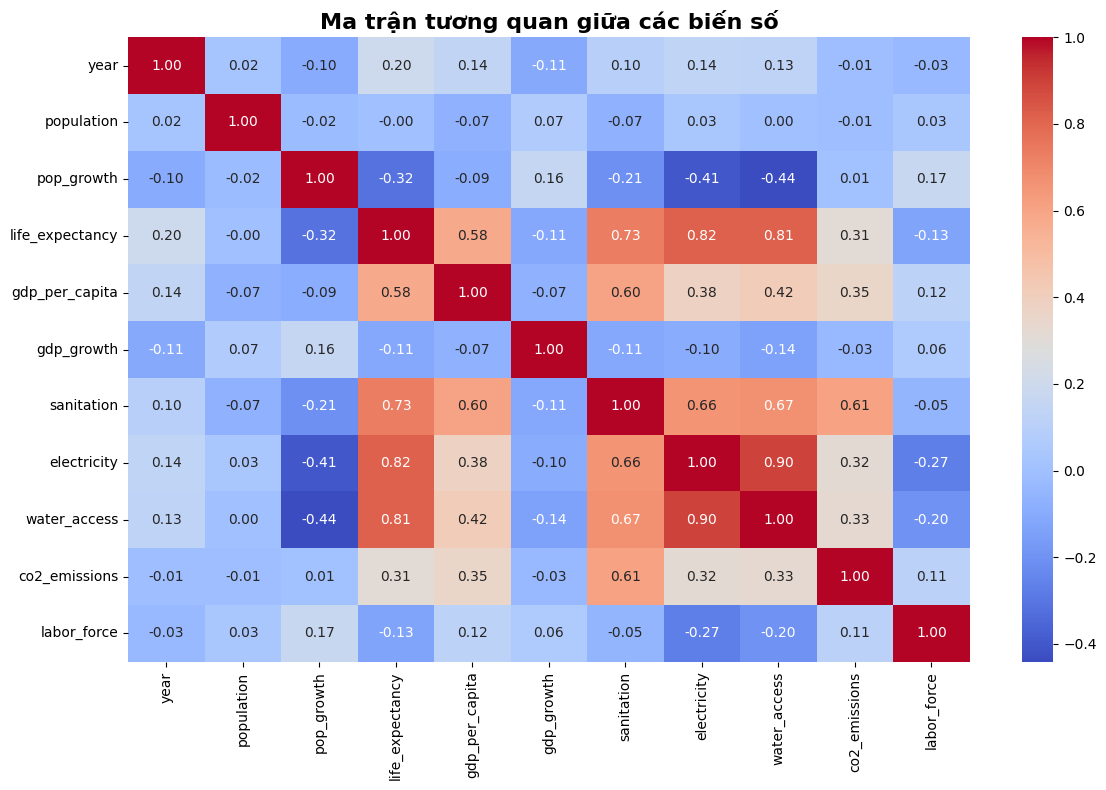

In [10]:
# Hiển thị heatmap tương quan để phục vụ việc lựa chọn biến dự đoán
plt.figure(figsize=(12, 8))
sns.heatmap(df.select_dtypes(include=[np.number]).corr(), annot=True, cmap="coolwarm", fmt=".2f")
plt.title("Ma trận tương quan giữa các biến số", fontsize=16, fontweight='bold')
plt.tight_layout()

Qua ma trận tương quan, ta thấy `sanitation`, `electricity`, `water_access` và `gdp_per_capita` là các biến quan trọng nhất, mang tính quyết định tới biến mục tiêu `life_expectancy` (có hệ số tương quan đều lớn hơn 0.5).


## Bước 4 - Chia dữ liệu Train/Validation/Test (trước khi điền thiếu)
### Mục tiêu:
- Chia dữ liệu thành 3 tập: train, validation và test.
- Chia theo tỷ lệ: 60% train/ 20% validation/ 20% test.


In [11]:
from sklearn.model_selection import train_test_split

# B??c 1: Train (60%) v? t?p t?m th?i (40%)
train_df, temp_df = train_test_split(
    df, test_size=0.40, random_state=42, shuffle=True
)

# B??c 2: Chia t?p t?m th?i th?nh validation (20%) v? Test (20%)
val_df, test_df = train_test_split(
    temp_df, test_size=0.50, random_state=42, shuffle=True
)

print("K?ch th??c:")
print("Train:", train_df.shape)
print("Validation:", val_df.shape)
print("Test:", test_df.shape)


K?ch th??c:
Train: (3124, 13)
Validation: (1042, 13)
Test: (1042, 13)


## Bước 5 - Điền giá trị thiếu (fit trên train)
Từ bước này trở đi, **tất cả phép điền thiếu chỉ fit trên train** rồi áp dụng cho validation/test để tránh rò rỉ dữ liệu.


### 5.1. Điền mean/median theo skewness cho các biến còn lại

#### Công thức Skewness (sử dụng trong pandas.Series.skew()):

$$g_1 = \frac{n}{(n-1)(n-2)} \sum_{i=1}^{n} \left(\frac{x_i - \bar{x}}{s}\right)^3$$

Trong đó:
- $n$: kích thước mẫu (số lượng giá trị)
- $x_i$: giá trị từng điểm dữ liệu
- $\bar{x}$: giá trị trung bình mẫu
- $s$: độ lệch chuẩn mẫu

**Quy tắc lựa chọn:**
- Nếu $|\text{Skewness}| \leq 0.5$: dữ liệu **gần như cân bằng** → Dùng **Mean**
- Nếu $|\text{Skewness}| > 0.5$: dữ liệu **lệch** → Dùng **Median** (ít bị ảnh hưởng bởi outliers)

| Giá trị Skewness | Phương pháp điền |
|-----------------|------------------|
| -0.5 ≤ Skew ≤ 0.5 | Mean |
| Skew < -0.5 hoặc Skew > 0.5 | Median |

Các biến này có tương quan thấp với nhau và tỷ lệ thiếu ít, nên dùng mean/median theo skewness là hợp lý.

In [12]:
# Tính Skewness theo train và điền giá trị cho cả train/val/test
print("GIÁ TRỊ SKEWNESS VÀ PHƯƠNG PHÁP ĐIỀN GIÁ TRỊ THIẾU (FIT TRÊN TRAIN):\n")

exclude_cols = ["life_expectancy", "sanitation"]
cols_to_fill = [col for col in numeric_cols if col not in exclude_cols]

# Tạo bảng để hiển thị kết quả
imputation_results = []

for col in cols_to_fill:
    skew_val = train_df[col].skew()
    if -0.5 <= skew_val <= 0.5:
        method = "Mean"
        fill_value = train_df[col].mean()
    else:
        method = "Median"
        fill_value = train_df[col].median()

    train_df[col] = train_df[col].fillna(fill_value)
    val_df[col] = val_df[col].fillna(fill_value)
    test_df[col] = test_df[col].fillna(fill_value)

    missing_before = (train_df[col].isna().sum() > 0)
    



GIÁ TRỊ SKEWNESS VÀ PHƯƠNG PHÁP ĐIỀN GIÁ TRỊ THIẾU (FIT TRÊN TRAIN):



### 5.3. Điền giá trị thiếu cho `sanitation` bằng MICE (Bayesian Ridge)
`sanitation` có tỷ lệ thiếu cao (>40%), nên dùng MICE với Bayesian Ridge để dự đoán dựa vào các biến khác (ngoại trừ `life_expectancy`).
Phương pháp này tận dụng mối quan hệ phi tuyến giữa các biến để điền giá trị thiếu một cách chính xác hơn.

In [13]:
from sklearn.experimental import enable_iterative_imputer  # noqa: F401
from sklearn.impute import IterativeImputer
from sklearn.linear_model import BayesianRidge

# Chuẩn bị dữ liệu để MICE: sử dụng tất cả các biến số trừ life_expectancy và sanitation
mice_cols_for_sanitation = [c for c in numeric_cols if c not in ["life_expectancy", "sanitation"]]

# Tạo Imputer với Bayesian Ridge
mice_imputer = IterativeImputer(
    estimator=BayesianRidge(),
    random_state=42,
    max_iter=20,
    verbose=0
)

# Fit trên train, áp dụng cho val/test
# Kết hợp sanitation với các biến khác để MICE hoạt động
train_for_impute = train_df[mice_cols_for_sanitation + ["sanitation"]].copy()
val_for_impute = val_df[mice_cols_for_sanitation + ["sanitation"]].copy()
test_for_impute = test_df[mice_cols_for_sanitation + ["sanitation"]].copy()

# Fit trên train và transform
train_imputed = mice_imputer.fit_transform(train_for_impute)
val_imputed = mice_imputer.transform(val_for_impute)
test_imputed = mice_imputer.transform(test_for_impute)

# Lấy cột sanitation (cột cuối cùng)
sanitation_idx = len(mice_cols_for_sanitation)
train_df["sanitation"] = train_imputed[:, sanitation_idx]
val_df["sanitation"] = val_imputed[:, sanitation_idx]
test_df["sanitation"] = test_imputed[:, sanitation_idx]

print("Đã điền sanitation bằng MICE (Bayesian Ridge)")

Đã điền sanitation bằng MICE (Bayesian Ridge)


In [14]:
# Ki?m tra l?i d? li?u sau khi ?i?n
print("T?ng s? gi? tr? NaN c?n l?i sau khi x? l?:")
print("Train:", train_df.isna().sum().sum())
print("Validation:", val_df.isna().sum().sum())
print("Test:", test_df.isna().sum().sum())


T?ng s? gi? tr? NaN c?n l?i sau khi x? l?:
Train: 0
Validation: 0
Test: 0


## Bước 6 - Lưu dữ liệu sau khi điền thiếu (chưa chuẩn hóa)


In [15]:
# L?u d? li?u ?? x? l? (ch?a chu?n h?a)
import os

os.makedirs("../data/processed", exist_ok=True)

# G?p l?i theo th? t? ch? s? g?c ?? ph?c v? tr?c quan h?a
imputed_df = pd.concat([train_df, val_df, test_df]).sort_index()
imputed_df.to_csv("../data/processed/processed_data.csv", index=False)

print("D? LI?U SAU ?I?N THI?U (CH?A CHU?N H?A):")
imputed_df.head()


D? LI?U SAU ?I?N THI?U (CH?A CHU?N H?A):


,country_name,country_code,year,population,pop_growth,life_expectancy,gdp_per_capita,gdp_growth,sanitation,electricity,water_access,co2_emissions,labor_force
0,Aruba,ABW,2000,90588.0,1.030817,72.939,20681.023027,7.622921,56.081766,91.7,94.488806,2.965073,61.135067
1,Aruba,ABW,2001,91439.0,0.935033,73.044,20740.132583,4.182002,59.201006,100.0,94.770491,2.969193,61.135067
2,Aruba,ABW,2002,92074.0,0.692052,73.135,21307.248251,-0.944953,60.684916,100.0,95.052176,3.221322,61.135067
3,Aruba,ABW,2003,93128.0,1.138229,73.236,21949.485996,1.110505,61.023015,100.0,95.333861,3.671291,61.135067
4,Aruba,ABW,2004,95138.0,2.135358,73.223,23700.631990,7.293728,60.135730,100.0,95.615545,3.667304,61.135067


In [16]:
imputed_df[imputed_df['country_name'] == 'Kuwait']['sanitation']

2650    100.0000
2651    100.0000
2652    100.0000
2653    100.0000
2654    100.0000
2655    100.0000
2656    100.0000
2657    100.0000
2658    100.0000
2659    100.0000
2660    100.0000
2661    100.0000
2662    100.0000
2663    100.0000
2664    100.0000
2665    100.0000
2666    100.0000
2667    100.0000
2668    100.0000
2669    100.0000
2670    100.0000
2671    100.0000
2672    100.0000
2673     89.6603
Name: sanitation, dtype: float64

## Bước 7 - Chuẩn hóa dữ liệu
### Mục tiêu:
- Chuẩn hóa dữ liệu số để đảm bảo các biến có cùng thang đo, giúp mô hình học hiệu quả hơn.
- Sử dụng StandardScaler (Z-score) cho các biến số.
- Không chuẩn hóa các biến phân loại như `country_name`, `country_code` vì chúng mang ý nghĩa phân loại, hữu ích cho mô hình.
- Không chuẩn hóa các cột `year` và `life_expectancy` vì:
  - `year` là chỉ số thời gian, mang ý nghĩa tuần tự, không cần chuẩn hóa.
  - `life_expectancy` là biến mục tiêu (target), việc chuẩn hóa hay không sẽ tùy thuộc vào thuật toán dự đoán sau này.

---

### Phương pháp chuẩn hóa: Z-score

$Z = \frac{X - \mu}{\sigma}$

Trong đó:
- $\mu$: giá trị trung bình của biến  
- $\sigma$ : độ lệch chuẩn của biến  
Sau chuẩn hóa, mỗi biến số có trung bình = 0 và độ lệch chuẩn = 1.


In [18]:
from sklearn.preprocessing import StandardScaler

# Ch?n c?c c?t d?ng s? c?n chu?n ho? (tr? year v? life_expectancy)
cols_to_scale = [
    c for c in train_df.select_dtypes(include=['float64', 'int64']).columns
    if c not in ['life_expectancy', 'year']
]

scaler = StandardScaler()
train_df[cols_to_scale] = scaler.fit_transform(train_df[cols_to_scale])
val_df[cols_to_scale] = scaler.transform(val_df[cols_to_scale])
test_df[cols_to_scale] = scaler.transform(test_df[cols_to_scale])

# L?u l?i d? li?u sau chu?n h?a
train_df.to_csv("../data/processed/train.csv", index=False)
val_df.to_csv("../data/processed/val.csv", index=False)
test_df.to_csv("../data/processed/test.csv", index=False)

# Hi?n th? d? li?u sau chu?n h?a
print("D? LI?U HU?N LUY?N SAU KHI CHU?N H?A:")
train_df.head()


D? LI?U HU?N LUY?N SAU KHI CHU?N H?A:


,country_name,country_code,year,population,pop_growth,life_expectancy,gdp_per_capita,gdp_growth,sanitation,electricity,water_access,co2_emissions,labor_force
1342,Denmark,DNK,2017,-0.203268,-0.421809,81.102439,1.686707,-0.051594,1.557773,0.642797,0.759523,0.118728,0.069223
3967,"Korea, Dem. People's Rep.",PRK,2017,-0.056081,-0.533916,73.034000,-0.411518,0.025571,-0.484005,-1.294730,0.442509,-0.216860,2.087276
3083,Madagascar,MDG,2008,-0.092002,1.006695,61.992000,-0.606460,0.539146,-1.583510,-2.194047,-2.556143,-0.528575,2.542268
1918,Greece,GRC,2018,-0.166804,-0.949233,81.787805,0.172322,-0.211843,1.277823,0.642797,0.759523,0.161633,-1.033944
4444,South Sudan,SSD,2019,-0.169075,0.999880,58.129000,-0.411518,0.025571,-1.420905,-2.593358,-2.658044,-0.281264,1.279234


## Kết luận

Sau khi hoàn thành các bước tiền xử lý dữ liệu, bộ dữ liệu đã được làm sạch, loại bỏ các dòng thiếu `life_expectancy`, chia train/validation/test trước khi điền thiếu, và chuẩn hóa dữ liệu để sẵn sàng cho bước huấn luyện mô hình dự đoán tuổi thọ trung bình (`life_expectancy`).

### Kết quả cuối cùng:
| Tập dữ liệu | Tỉ lệ | Ghi chú |
|-----------|------|---------|
| Train | 60% mẫu | Dùng để huấn luyện mô hình |
| Validation | 20% mẫu | Dùng để điều chỉnh tham số, chọn mô hình tốt nhất |
| Test | 20% mẫu | Dùng để đánh giá mô hình cuối cùng |

### Tổng kết:
- Dữ liệu đã được làm sạch: loại bỏ trùng lặp và dòng thiếu `life_expectancy`.
- Điền thiếu theo nguyên tắc: mean/median theo skewness (fit trên train), MICE cho `water_access`, nội suy + median cho `sanitation`.
- Dữ liệu đã được chia thành train/validation/test **trước** khi điền thiếu và chuẩn hóa.
- Các cột dạng số đã được chuẩn hóa Z-score (trừ `life_expectancy`, `year`).
